In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df=pd.read_csv('strong_scaling_results.txt', sep=' ', header=None)

In [126]:
df.columns = ['time', 'nworkers', 'blocksize', 'N', 'scheduling']


In [127]:
# drop blocksize column
df.drop('blocksize', axis=1, inplace=True)

In [128]:
# group by nworkers and scheduling  
grouped = df.groupby(['nworkers', 'scheduling'])

In [129]:
# delete max and min values for each group
df = grouped.apply(lambda x: x[(x['time'] != x['time'].max()) & (x['time'] != x['time'].min())])

In [130]:
# reset index
df = df.reset_index(drop=True)

In [131]:
df 

,time,nworkers,N,scheduling
0,7.162930,1,2048,0
1,7.243390,1,2048,0
2,7.281200,1,2048,0
3,7.204470,1,2048,0
4,7.205130,1,2048,0
...,...,...,...,...
171,0.742716,20,2048,1
172,0.738534,20,2048,1
173,0.745624,20,2048,1
174,0.741061,20,2048,1


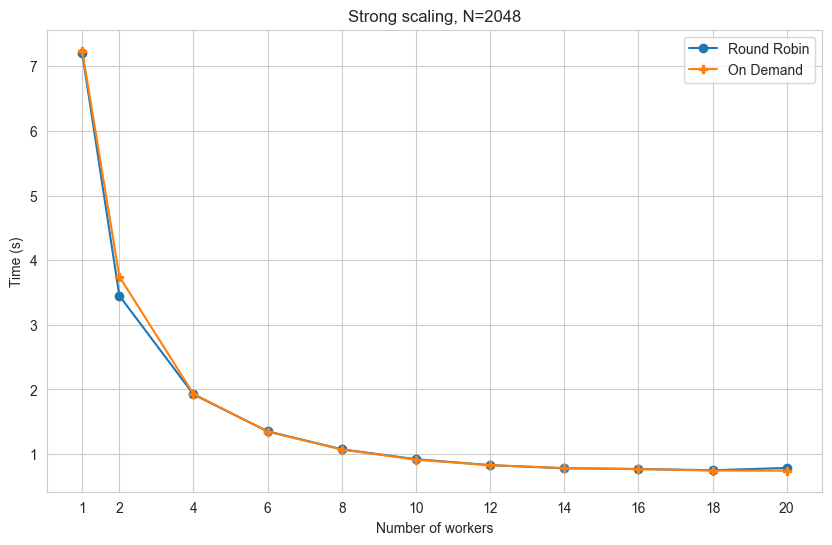

In [132]:
# group by nworkers and scheduling again, mean values and plot
grouped = df.groupby(['nworkers', 'scheduling']).mean()
grouped = grouped.reset_index()

df_rr = grouped[grouped['scheduling'] == 0]
df_on_demand = grouped[grouped['scheduling'] == 1]

plt.figure(figsize=(10, 6))
plt.plot(df_rr['nworkers'], df_rr['time'], label='Round Robin', marker='o')
plt.plot(df_on_demand['nworkers'], df_on_demand['time'], label='On Demand', marker='P')
plt.xticks(df_rr['nworkers'])
plt.xlabel('Number of workers')
plt.ylabel('Time (s)')
plt.title('Strong scaling, N=2048')
plt.legend()
plt.savefig('images/strong_scaling.png')
plt.show()



In [133]:
df_rr['speedup'] = df_rr['time'].iloc[0] / df_rr['time']
df_on_demand['speedup'] = df_on_demand['time'].iloc[0] / df_on_demand['time']
df_rr['efficiency'] = df_rr['speedup'] / df_rr['nworkers']
df_on_demand['efficiency'] = df_on_demand['speedup'] / df_on_demand['nworkers']

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_26836\3002163701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rr['speedup'] = df_rr['time'].iloc[0] / df_rr['time']
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_26836\3002163701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_on_demand['speedup'] = df_on_demand['time'].iloc[0] / df_on_demand['time']
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_26836\3002163701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

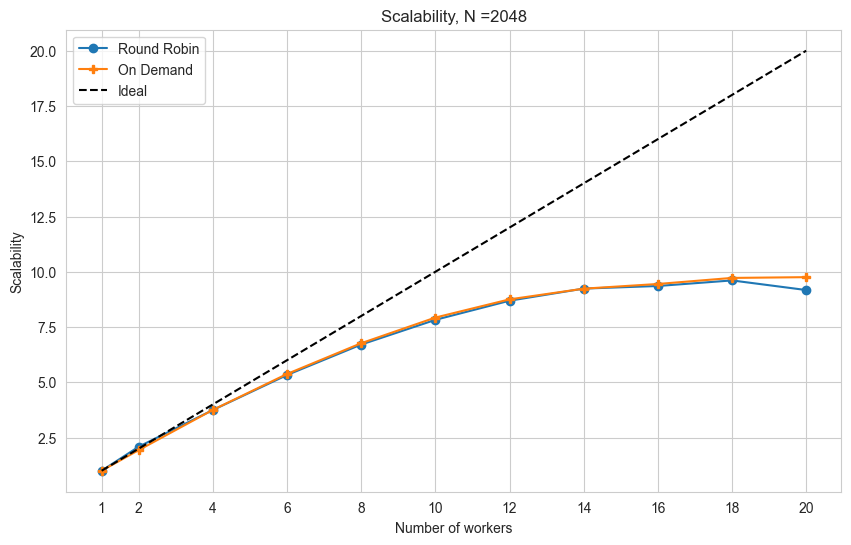

In [139]:
plt.figure(figsize=(10, 6))
plt.plot(df_rr['nworkers'], df_rr['speedup'], label='Round Robin', marker='o')
plt.plot(df_on_demand['nworkers'], df_on_demand['speedup'], label='On Demand', marker='P')
plt.plot(df_rr['nworkers'], df_rr['nworkers'], label='Ideal', linestyle='--', color='black' )
plt.xticks(df_rr['nworkers'])
plt.xlabel('Number of workers')
plt.ylabel('Scalability')
plt.title('Scalability, N =2048')
plt.legend()
plt.savefig('images/strong_scaling_speedup.png')
plt.show()


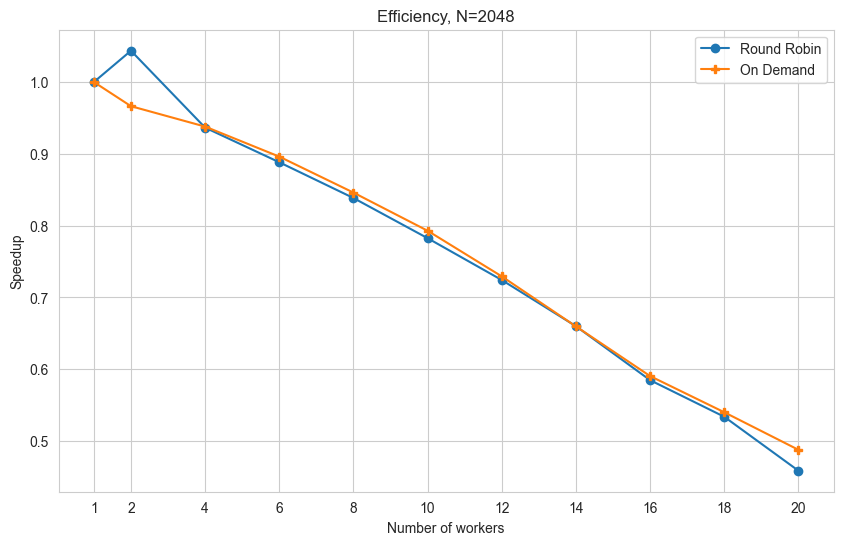

In [140]:

plt.figure(figsize=(10, 6))
plt.plot(df_rr['nworkers'], df_rr['efficiency'], label='Round Robin', marker='o')
plt.plot(df_on_demand['nworkers'], df_on_demand['efficiency'], label='On Demand', marker='P')
plt.xticks(df_rr['nworkers'])
plt.xlabel('Number of workers')
plt.ylabel('Speedup')
plt.title('Efficiency, N=2048')
plt.legend()
plt.savefig('images/strong_scaling_eff.png')
plt.show()


In [136]:
# table
print(df_rr)
print(df_on_demand)
# table to latex


    nworkers  scheduling      time       N   speedup  efficiency
0          1           0  7.201411  2048.0  1.000000    1.000000
2          2           0  3.450266  2048.0  2.087205    1.043602
4          4           0  1.922404  2048.0  3.746045    0.936511
6          6           0  1.351215  2048.0  5.329582    0.888264
8          8           0  1.073596  2048.0  6.707746    0.838468
10        10           0  0.920279  2048.0  7.825245    0.782524
12        12           0  0.828590  2048.0  8.691160    0.724263
14        14           0  0.779442  2048.0  9.239194    0.659942
16        16           0  0.769643  2048.0  9.356817    0.584801
18        18           0  0.749478  2048.0  9.608563    0.533809
20        20           0  0.785008  2048.0  9.173676    0.458684
    nworkers  scheduling      time       N   speedup  efficiency
1          1           1  7.239953  2048.0  1.000000    1.000000
3          2           1  3.745994  2048.0  1.932719    0.966359
5          4           1 

In [137]:
df_rr_latex = df_rr.to_latex(index=False)
df_on_demand_latex = df_on_demand.to_latex(index=False)

with open('strong_scaling_rr.tex', 'w') as f:
    f.write(df_rr_latex)

with open('strong_scaling_on_demand.tex', 'w') as f:
    f.write(df_on_demand_latex)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_26836\2155703587.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_rr_latex = df_rr.to_latex(index=False)
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_26836\2155703587.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_on_demand_latex = df_on_demand.to_latex(index=False)
